In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import os
from os.path import isfile, join
import re

In [65]:
#path = r"./Data/6Bots80Games"
#path = r"./Data/6Bots15Kills80Games"
#path = r"./Data/6BotsSymetricRes"
#path = r"./Data/SymetricResAgressor"
#path = r"./Data/SymetricRes30VP"
#path = r"./Data/6Bots30VP"
#path = r"./Data/6BotsInifinityBugs"
#path = r"./Data/6BotsSimetricResWhite1Beetle"
#path = r"./Data/SimResWhite2Ants2Grassh"
#path = r"./Data/6BotsMap2"
#path = r"./Data/6BotsBanned1"
#path = r"./Data/symmBanned1"
path = r"./Data/symmBanned1RandomBot"

In [66]:
ignoredBots = {}
#ignoredBots = {"Territorial", "Economic", "Pacifist"}

In [67]:
data_files = [f for f in os.listdir(path) if (isfile(join(path, f)) and f[-4:] == ".csv")]
white_bots = dict()
black_bots = dict()
bots_set = set()
for f in data_files:
    g = f[:-4].split('_')
    if g[0] in ignoredBots or g[1] in ignoredBots:
        continue
    white_bots[g[0]] = white_bots.get(g[0], 0) + 1
    black_bots[g[1]] = black_bots.get(g[1], 0) + 1
    bots_set.add(g[0])
    bots_set.add(g[1])
for bot in bots_set:
    if white_bots.get(bot, -1) != len(bots_set) or black_bots.get(bot, -1) != len(bots_set):
        print(f"WHite bots: {white_bots}")
        print(f"Black bots: {black_bots}")
        raise Exception("Directory does not contain proper files!")
bots = list(bots_set)
draws = np.zeros((len(bots), len(bots)))
w_winrate = np.zeros((len(bots), len(bots)))
b_winrate = np.zeros((len(bots), len(bots)))
game_length = np.zeros((len(bots), len(bots)))
n_games = 0
for row, w_bot in enumerate(bots):
    for column, b_bot in enumerate(bots):
        df = pd.read_csv(path + "/" + w_bot + "_" + b_bot + ".csv")
        df["NTurns"] = [math.ceil(n / 6) for n in df["NTurns"]]

        n_draws = len(df[df["Winner"] == 'D'])
        w_wins = len(df[df["Winner"] == 'B'])
        if df.shape[0] - n_draws != 0:
            w_winrate[row][column] = round(100 * w_wins / (df.shape[0] - n_draws), 2)
            b_winrate[row][column] = 100 - round(100 * w_wins / (df.shape[0] - n_draws), 2)
        draws[row][column] = round(100 * n_draws / df.shape[0], 2)
        game_length[row][column] = df["NTurns"].median()
        n_games = df.shape[0]

In [68]:
n_white_wins = 0
n_black_wins = 0
n_draws = 0
for row, w_bot in enumerate(bots):
    for column, b_bot in enumerate(bots):
        df = pd.read_csv(path + "/" + w_bot + "_" + b_bot + ".csv")
        df["NTurns"] = [math.ceil(n / 6) for n in df["NTurns"]]
        n_draws += len(df[df["Winner"] == 'D'])
        n_black_wins += len(df[df["Winner"] == 'C'])
        n_white_wins += len(df[df["Winner"] == 'B'])
all_games = n_draws + n_black_wins + n_white_wins
print(f"Overall white winrate: {round(100 * n_white_wins / all_games, 2)}%")
print(f"Overall black winrate: {round(100 * n_black_wins / all_games, 2)}%")
print(f"Overall % of draws: {round(100 * n_draws / all_games, 2)}%")

Overall white winrate: 3.4%
Overall black winrate: 13.7%
Overall % of draws: 82.9%


number of games: 1000


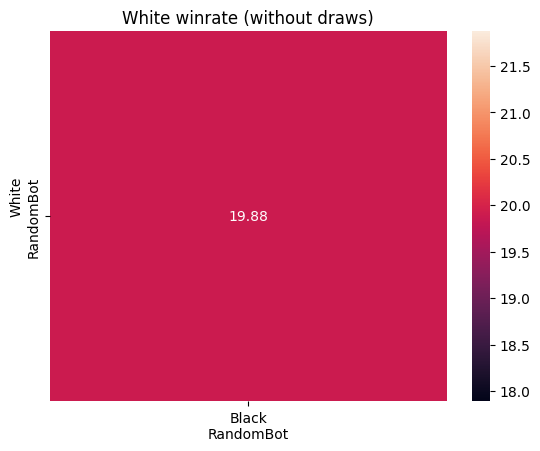

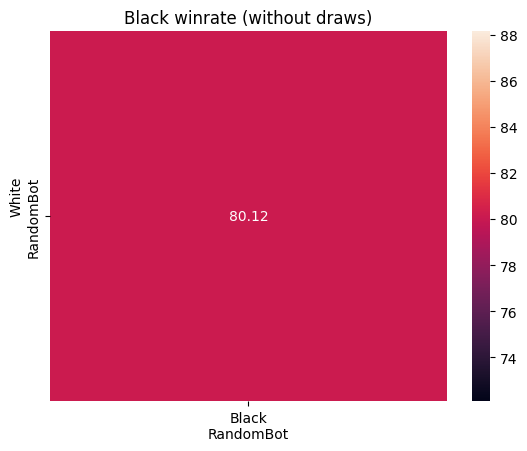

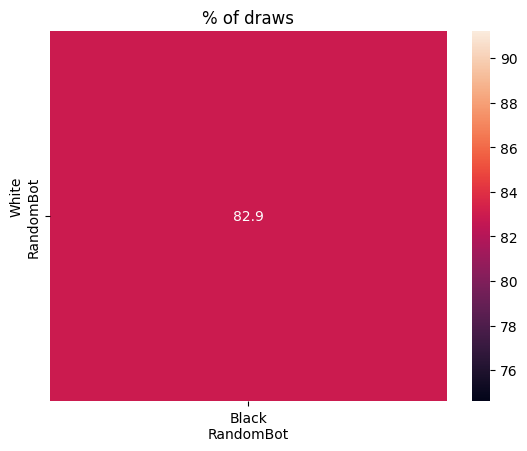

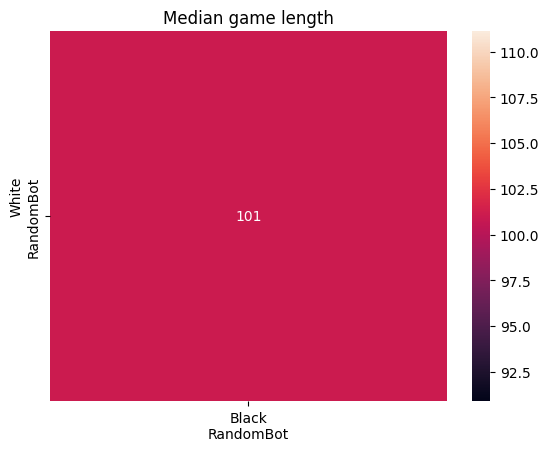

In [69]:
x_lab = [("Black\n" + bot) for bot in bots]
y_lab = [("White\n" + bot) for bot in bots]

print(f"number of games: {n_games}")
plt.title("White winrate (without draws)")
sns.heatmap(w_winrate, xticklabels=x_lab, yticklabels=y_lab, annot=w_winrate, fmt='g')
plt.show()

plt.title("Black winrate (without draws)")
sns.heatmap(b_winrate, xticklabels=x_lab, yticklabels=y_lab, annot=b_winrate, fmt='g')
plt.show()

plt.title(r"% of draws")
sns.heatmap(draws, xticklabels=x_lab, yticklabels=y_lab, annot=draws, fmt='g')
plt.show()

plt.title("Median game length")
sns.heatmap(game_length, xticklabels=x_lab, yticklabels=y_lab, annot=game_length, fmt='g')
plt.show()

In [70]:
def w_average(winrates, draws):
    weights = 0
    res = 0
    for i, w_rate in enumerate(winrates):
        w = 100 - draws[i]
        weights += w
        res += w_rate * w
    return round(res / weights, 2)

White bots:


<Axes: title={'center': 'White bots'}>

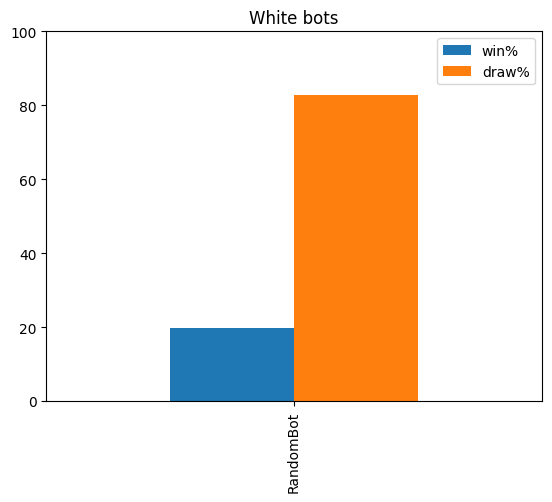

In [71]:
max_len = max([len(b) for b in bots])
results = []
for row, w_bot in enumerate(bots):
    avg_wr = w_average(w_winrate[row,:], draws[row,:])
    avg_d = round(np.average(draws[row,:]), 2)
    results.append((w_bot, avg_wr, avg_d))
#results.sort(key=lambda x: x[1], reverse=True)
print("White bots:")
white_data = pd.DataFrame({"win%":[r[1] for r in results], "draw%":[r[2] for r in results]}, columns=["win%", "draw%"], index=[r[0] for r in results])
white_data.plot.bar(title="White bots", ylim=(0, 100))


Black bots:


<Axes: title={'center': 'Black bots'}>

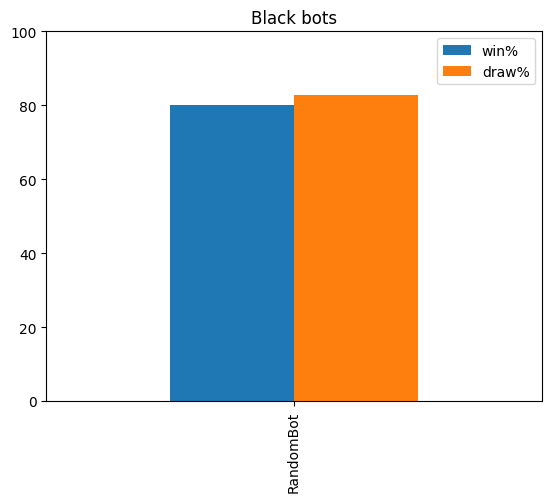

In [72]:
max_len = max([len(b) for b in bots])
results = []
for col, b_bot in enumerate(bots):
    avg_wr = w_average(b_winrate[:,col], draws[:,col])
    avg_d = round(np.average(draws[:,col]), 2)
    results.append((b_bot, avg_wr, avg_d))
#results.sort(key=lambda x: x[1], reverse=True)
print("Black bots:")
black_data = pd.DataFrame({"win%":[r[1] for r in results], "draw%":[r[2] for r in results]}, columns=["win%", "draw%"], index=[r[0] for r in results])
black_data.plot.bar(title="Black bots", ylim=(0, 100))
